In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df.shape

(200, 5)

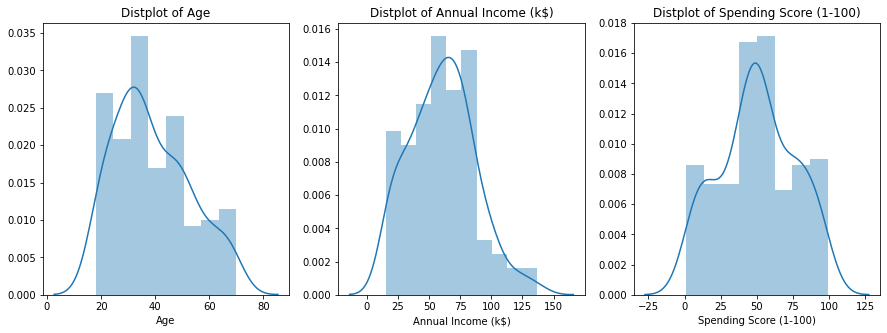

In [5]:
plt.figure(figsize=(15,5))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.distplot(df[x])
    plt.title('Distplot of {}'.format(x))

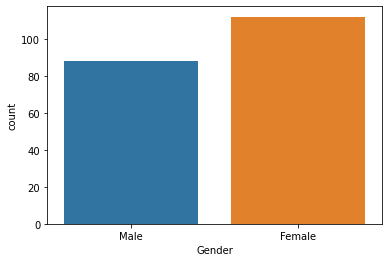

In [6]:
sns.countplot('Gender', data=df)

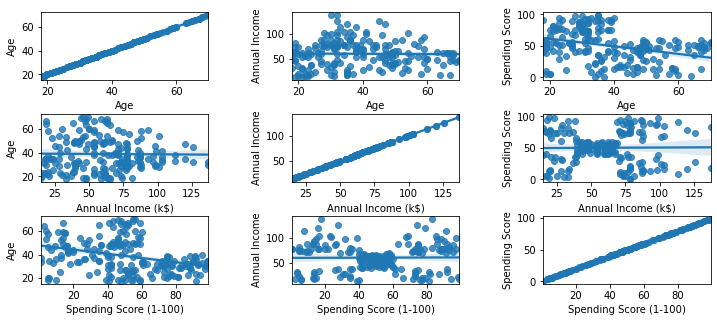

In [7]:
plt.figure(figsize=(12,5))
n= 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n +=1
        plt.subplot(3,3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split())>1 else y)


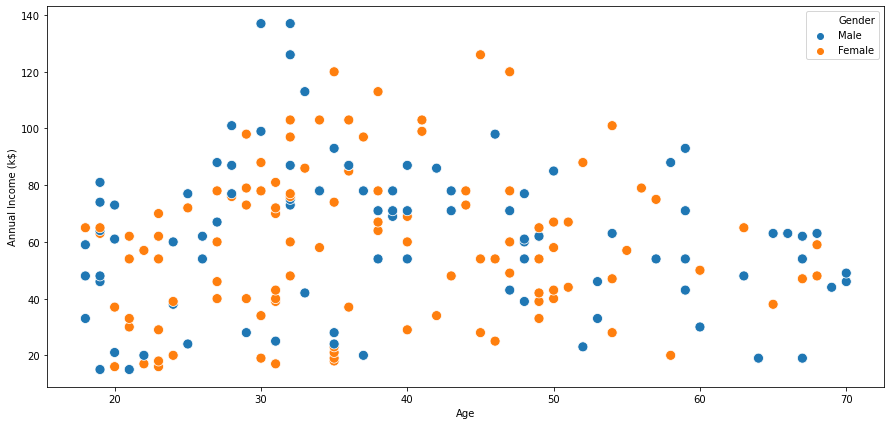

In [8]:
plt.figure(figsize= (15,7))
sns.scatterplot(x= 'Age',  y ='Annual Income (k$)', data=df, hue='Gender', s=100)

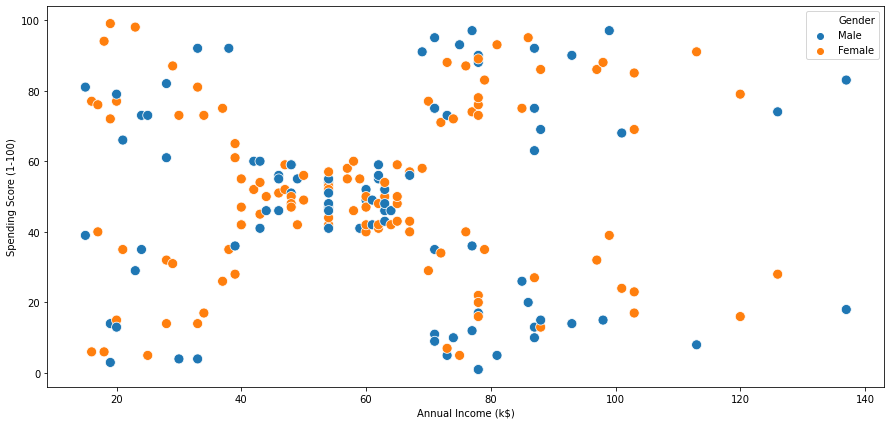

In [9]:
plt.figure(figsize= (15,7))
sns.scatterplot(x ='Annual Income (k$)', y = 'Spending Score (1-100)',data=df, hue='Gender', s=100)

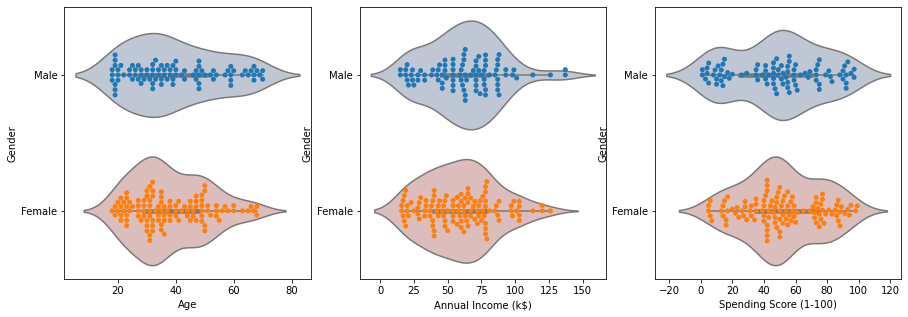

In [10]:
plt.figure(figsize=(15,5))
n=0
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.violinplot(x=col, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=col, y='Gender', data=df)

Text(0.5, 0, 'Number of Clusters')

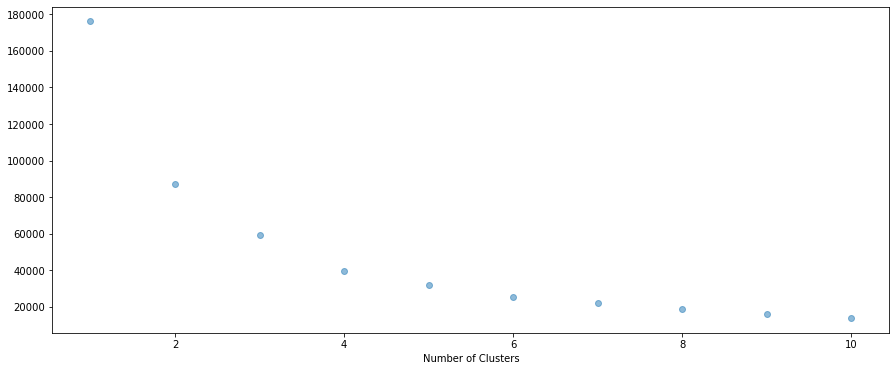

In [14]:
from sklearn.cluster import KMeans
X = df[['Age', 'Annual Income (k$)']].values
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='auto')
    algo.fit(X)
    inertia.append(algo.inertia_)
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o', alpha=0.5)
plt.xlabel('Number of Clusters')

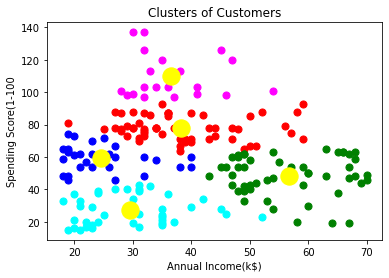

In [12]:
algo = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='auto')
y_kmeans = algo.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.scatter(algo.cluster_centers_[:, 0], algo.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()


Text(0.5, 0, 'Number of Clusters')

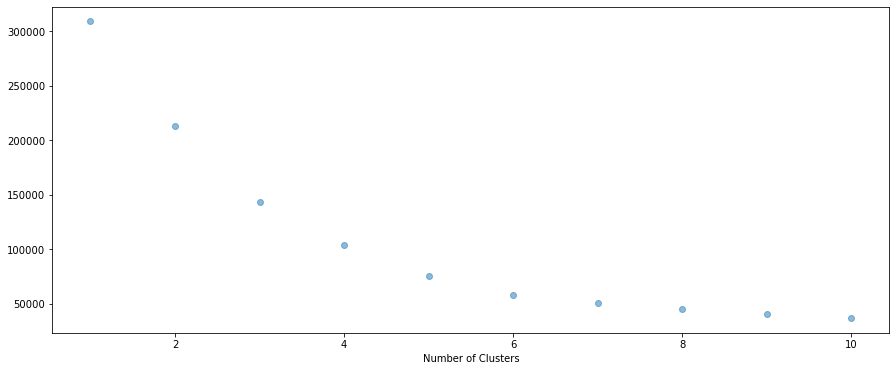

In [15]:
from sklearn.cluster import KMeans
X1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='auto')
    algo.fit(X1)
    inertia.append(algo.inertia_)
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o', alpha=0.5)
plt.xlabel('Number of Clusters')

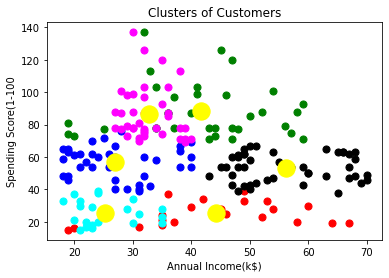

In [17]:
algo = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='auto')
y_kmeans = algo.fit_predict(X1)
plt.scatter(X1[y_kmeans==0, 0], X1[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X1[y_kmeans==1, 0], X1[y_kmeans==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(X1[y_kmeans==2, 0], X1[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(X1[y_kmeans==3, 0], X1[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(X1[y_kmeans==4, 0], X1[y_kmeans==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.scatter(X1[y_kmeans==5, 0], X1[y_kmeans==5, 1], s=50, c='black', label ='Cluster 6')
plt.scatter(algo.cluster_centers_[:, 0], algo.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()
